In [1]:
from ucimlrepo import fetch_ucirepo

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px

import scipy.stats as stats

import sys

In [2]:
# Set the maximum width of the display
pd.set_option('display.width', 1000)

# Set the maximum number of columns to display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.min_rows', 30)

pd.set_option('display.precision', 2)

In [3]:
# fetch dataset
data = fetch_ucirepo(id=374)

# Convert the data to a pandas DataFrame
df = pd.DataFrame(data=data.data.features)

re_express = r'(\d{4})-(\d{2})-(\d{2})(\d{2}):(\d{2}):(\d{2})'

# Replace using the pattern
df['date'] = df['date'].str.replace(re_express, r'\1-\2-\3 \4:\5:\6', regex=True)

# Convert the 'date' column to datetime format
df['date'] = pd.to_datetime(df['date'], format="%Y-%m-%d %H:%M:%S", errors='raise')

# df['date'] = pd.date_range(start='2016-01-11 17:00:00', end='2016-05-27 18:00:00', freq='10min')

# If the data has target labels, you can also add them to the DataFrame
df['target'] = data.data.targets

# Set the 'date' column as the index
df.set_index('date', inplace=True)

# Optionally, sort the DataFrame by the new datetime index
df.sort_index(inplace=True)

# since we sort the dataframe by the new datetime index
df = df.reset_index()

# Display the first few rows of the DataFrame
df.head()

,date,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,T6,RH_6,T7,RH_7,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2,target
0,2016-01-11 17:00:00,30,19.89,47.60,19.2,44.79,19.79,44.73,19.00,45.57,17.17,55.20,7.03,84.26,17.20,41.63,18.2,48.90,17.03,45.53,6.60,733.5,92.0,7.00,63.00,5.3,13.28,13.28,60
1,2016-01-11 17:10:00,30,19.89,46.69,19.2,44.72,19.79,44.79,19.00,45.99,17.17,55.20,6.83,84.06,17.20,41.56,18.2,48.86,17.07,45.56,6.48,733.6,92.0,6.67,59.17,5.2,18.61,18.61,60
2,2016-01-11 17:20:00,30,19.89,46.30,19.2,44.63,19.79,44.93,18.93,45.89,17.17,55.09,6.56,83.16,17.20,41.43,18.2,48.73,17.00,45.50,6.37,733.7,92.0,6.33,55.33,5.1,28.64,28.64,50
3,2016-01-11 17:30:00,40,19.89,46.07,19.2,44.59,19.79,45.00,18.89,45.72,17.17,55.09,6.43,83.42,17.13,41.29,18.1,48.59,17.00,45.40,6.25,733.8,92.0,6.00,51.50,5.0,45.41,45.41,50
4,2016-01-11 17:40:00,40,19.89,46.33,19.2,44.53,19.79,45.00,18.89,45.53,17.20,55.09,6.37,84.89,17.20,41.23,18.1,48.59,17.00,45.40,6.13,733.9,92.0,5.67,47.67,4.9,10.08,10.08,60


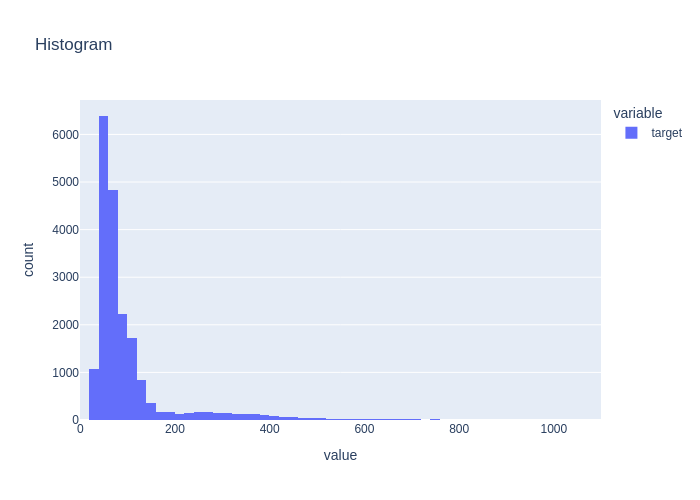

In [4]:
# Creating a histogram
fig = px.histogram(df.target, nbins=100, title='Histogram')

# Show the histogram
# fig.show()
fig.show("png")

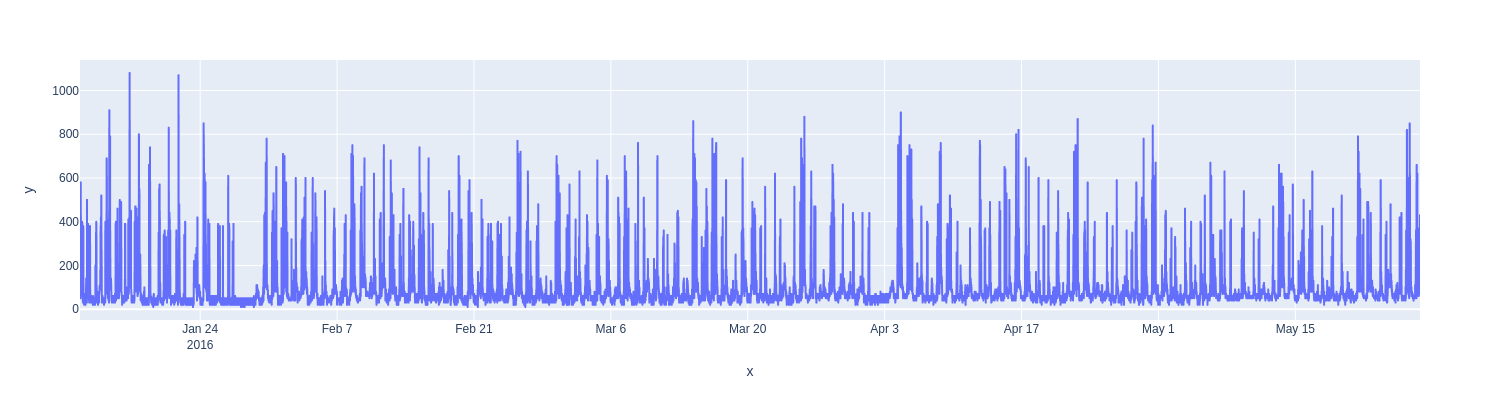

In [5]:

fig = px.line(x=df.date, y=df.target)
fig.update_layout(width=1500, height=400)
# fig.show()
fig.show("png")

##### The exponential smoothing (ETS) algorithm

In [6]:
#Import the model that we are going to use:
from tqdm import tqdm
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsforecast import StatsForecast
from statsforecast.models import AutoETS

import plotly.subplots as sp
import plotly.graph_objs as go
import statsmodels.api as sm
import numpy as np

# 'M' is deprecated and will be removed in a future version, please use 'ME' instead.

/home/bruno/anaconda3/envs/MLOps/lib/python3.12/site-packages/statsforecast/core.py:26: TqdmExperimentalWarning:

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)

/home/bruno/anaconda3/envs/MLOps/lib/python3.12/site-packages/statsforecast/utils.py:237: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



In [7]:
df_time = pd.DataFrame()

df_time['ds'] = df['date']
df_time['y'] = df['target']
df_time['unique_id'] = '1'

df_time

,ds,y,unique_id
0,2016-01-11 17:00:00,60,1
1,2016-01-11 17:10:00,60,1
2,2016-01-11 17:20:00,50,1
3,2016-01-11 17:30:00,50,1
4,2016-01-11 17:40:00,60,1
5,2016-01-11 17:50:00,50,1
6,2016-01-11 18:00:00,60,1
7,2016-01-11 18:10:00,60,1
8,2016-01-11 18:20:00,60,1
9,2016-01-11 18:30:00,70,1


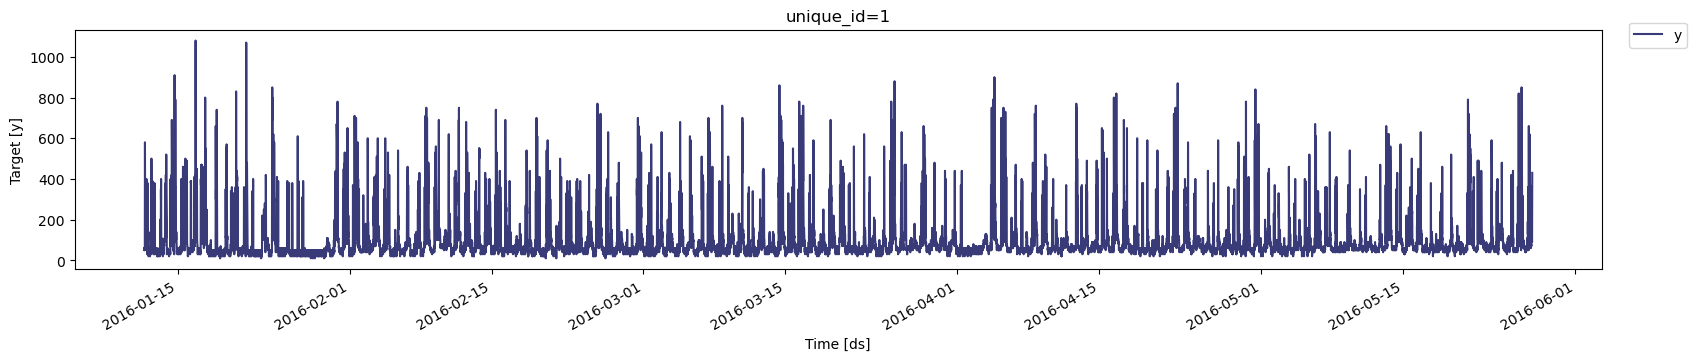

In [8]:
from statsforecast import StatsForecast

StatsForecast.plot(df=df_time)


##### Autocorrelation plots

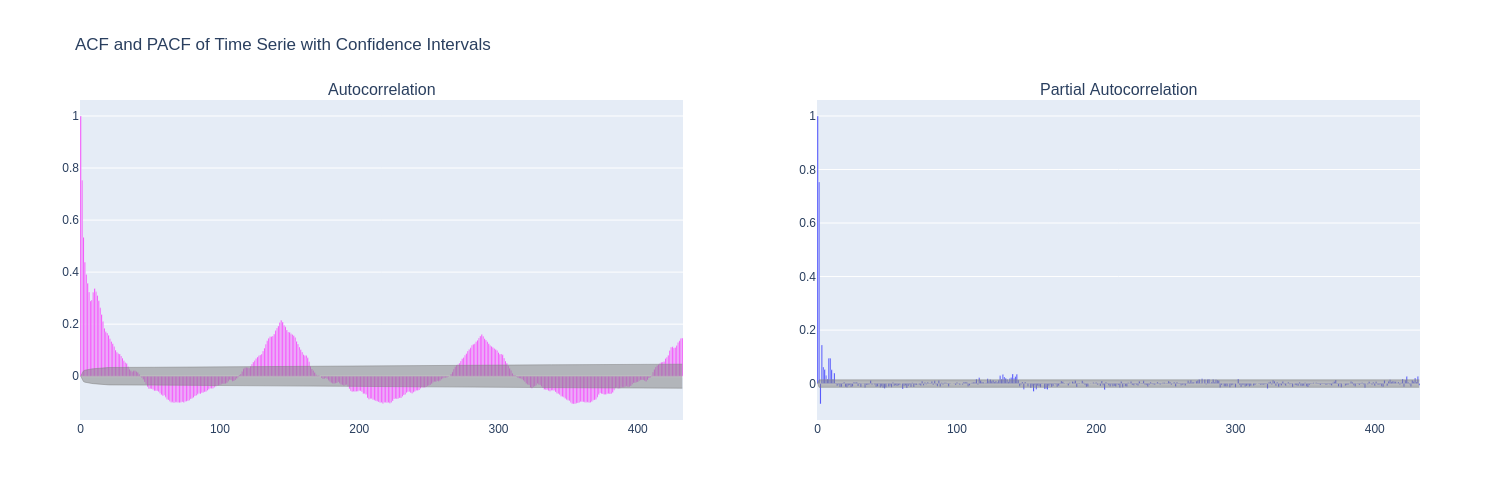

In [9]:

# Generate ACF and PACF values with confidence intervals
acf_values, confint_acf = sm.tsa.acf(df_time["y"], nlags=432, alpha=0.05)  # 95% confidence interval
pacf_values, confint_pacf = sm.tsa.pacf(df_time["y"], nlags=432, alpha=0.05)

# Calculate lower and upper bounds for ACF and PACF
lower_acf = confint_acf[:, 0] - acf_values
upper_acf = confint_acf[:, 1] - acf_values

lower_pacf = confint_pacf[:, 0] - pacf_values
upper_pacf = confint_pacf[:, 1] - pacf_values

# Create subplots
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=("Autocorrelation", "Partial Autocorrelation"))

# Plot ACF with confidence intervals
fig.add_trace(go.Bar(x=np.arange(len(acf_values)), y=acf_values, marker_color="fuchsia", name="ACF"), row=1, col=1)

fig.add_trace(go.Scatter(
    x=np.arange(len(acf_values)),
    y=lower_acf,
    mode='lines',
    line=dict(color='gray', width=0.5),
    name="Lower CI",
    showlegend=False
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=np.arange(len(acf_values)),
    y=upper_acf,
    mode='lines',
    fill='tonexty',  # Fill area between the lower and upper bounds
    line=dict(color='gray', width=0.5),
    name="Upper CI",
    showlegend=False
), row=1, col=1)

# Plot PACF with confidence intervals
fig.add_trace(go.Bar(x=np.arange(len(pacf_values)), y=pacf_values, marker_color="blue", name="PACF"), row=1, col=2)

fig.add_trace(go.Scatter(
    x=np.arange(len(pacf_values)),
    y=lower_pacf,
    mode='lines',
    line=dict(color='gray', width=0.5),
    name="Lower CI",
    showlegend=False
), row=1, col=2)

fig.add_trace(go.Scatter(
    x=np.arange(len(pacf_values)),
    y=upper_pacf,
    mode='lines',
    fill='tonexty',
    line=dict(color='gray', width=0.5),
    name="Upper CI",
    showlegend=False
), row=1, col=2)

# Update layout
fig.update_layout(title_text="ACF and PACF of Time Serie with Confidence Intervals", showlegend=False, height=500, width=1500)

# Show plot
# fig.show()
fig.show("png")

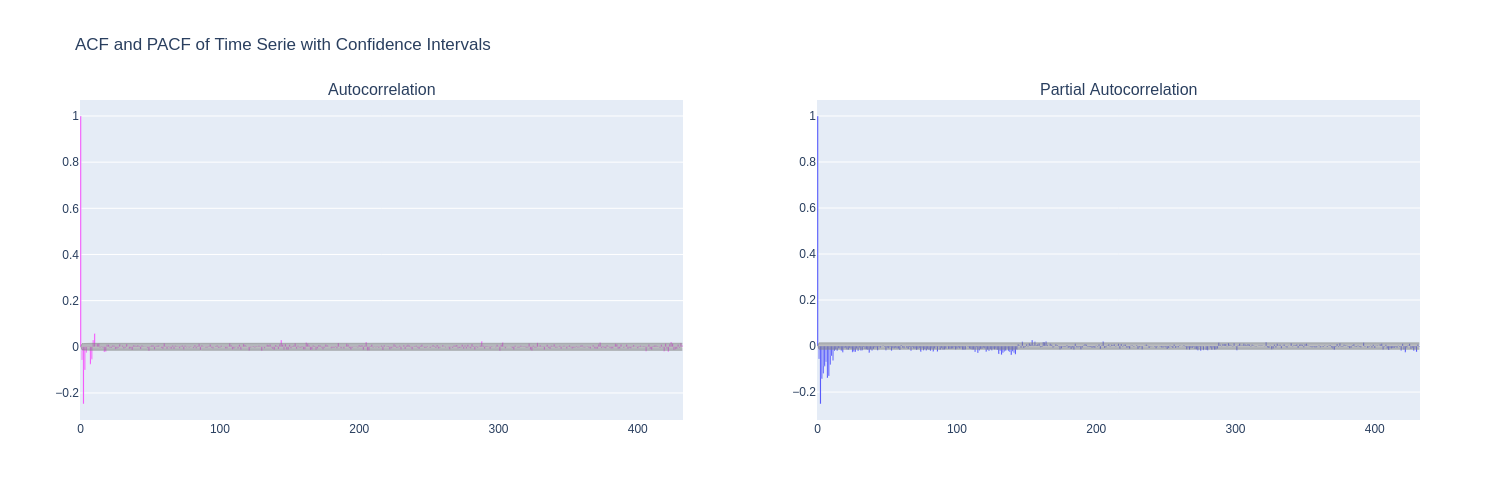

In [10]:
diffed_series_1 = df_time["y"].diff(periods=1)

diffed_series_1.dropna(inplace=True)

# Generate ACF and PACF values with confidence intervals
acf_values, confint_acf = sm.tsa.acf(diffed_series_1, nlags=432, alpha=0.05)  # 95% confidence interval
pacf_values, confint_pacf = sm.tsa.pacf(diffed_series_1, nlags=432, alpha=0.05)

# Calculate lower and upper bounds for ACF and PACF
lower_acf = confint_acf[:, 0] - acf_values
upper_acf = confint_acf[:, 1] - acf_values

lower_pacf = confint_pacf[:, 0] - pacf_values
upper_pacf = confint_pacf[:, 1] - pacf_values

# Create subplots
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=("Autocorrelation", "Partial Autocorrelation"))

# Plot ACF with confidence intervals
fig.add_trace(go.Bar(x=np.arange(len(acf_values)), y=acf_values, marker_color="fuchsia", name="ACF"), row=1, col=1)

fig.add_trace(go.Scatter(
    x=np.arange(len(acf_values)),
    y=lower_acf,
    mode='lines',
    line=dict(color='gray', width=0.5),
    name="Lower CI",
    showlegend=False
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=np.arange(len(acf_values)),
    y=upper_acf,
    mode='lines',
    fill='tonexty',  # Fill area between the lower and upper bounds
    line=dict(color='gray', width=0.5),
    name="Upper CI",
    showlegend=False
), row=1, col=1)

# Plot PACF with confidence intervals
fig.add_trace(go.Bar(x=np.arange(len(pacf_values)), y=pacf_values, marker_color="blue", name="PACF"), row=1, col=2)

fig.add_trace(go.Scatter(
    x=np.arange(len(pacf_values)),
    y=lower_pacf,
    mode='lines',
    line=dict(color='gray', width=0.5),
    name="Lower CI",
    showlegend=False
), row=1, col=2)

fig.add_trace(go.Scatter(
    x=np.arange(len(pacf_values)),
    y=upper_pacf,
    mode='lines',
    fill='tonexty',
    line=dict(color='gray', width=0.5),
    name="Upper CI",
    showlegend=False
), row=1, col=2)

# Update layout
fig.update_layout(title_text="ACF and PACF of Time Serie with Confidence Intervals", showlegend=False, height=500, width=1500)

# Show plot
# fig.show()
fig.show("png")

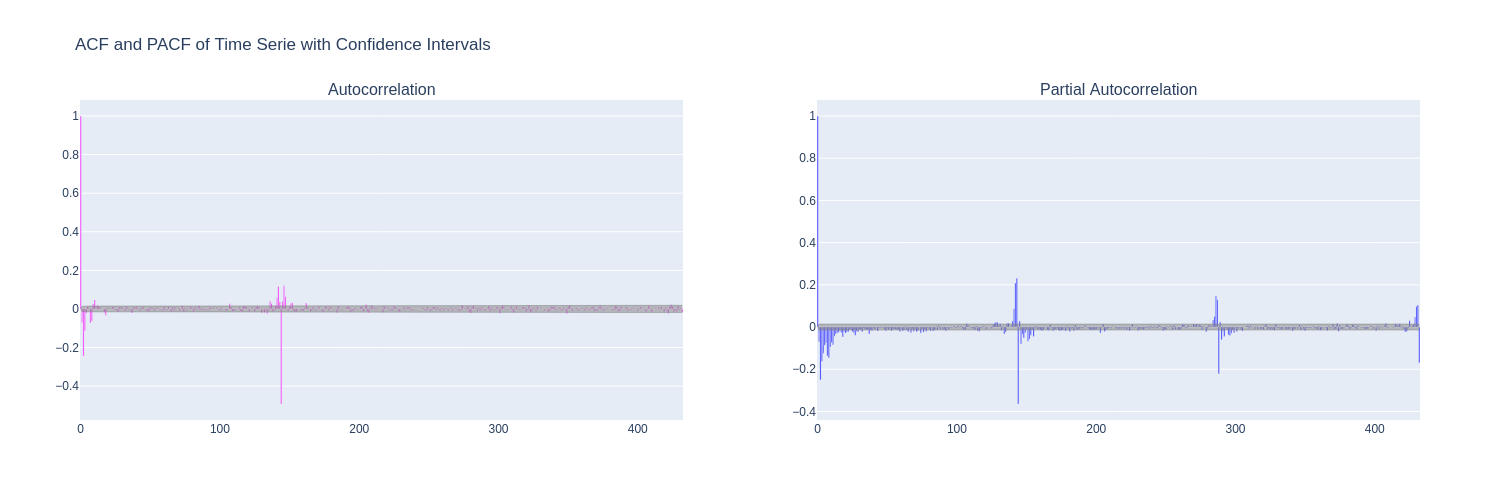

In [11]:
diffed_series_2 = diffed_series_1.diff(periods=144)

diffed_series_2.dropna(inplace=True)

# Generate ACF and PACF values with confidence intervals
acf_values, confint_acf = sm.tsa.acf(diffed_series_2, nlags=432, alpha=0.05)  # 95% confidence interval
pacf_values, confint_pacf = sm.tsa.pacf(diffed_series_2, nlags=432, alpha=0.05)

# Calculate lower and upper bounds for ACF and PACF
lower_acf = confint_acf[:, 0] - acf_values
upper_acf = confint_acf[:, 1] - acf_values

lower_pacf = confint_pacf[:, 0] - pacf_values
upper_pacf = confint_pacf[:, 1] - pacf_values

# Create subplots
fig = sp.make_subplots(rows=1, cols=2, subplot_titles=("Autocorrelation", "Partial Autocorrelation"))

# Plot ACF with confidence intervals
fig.add_trace(go.Bar(x=np.arange(len(acf_values)), y=acf_values, marker_color="fuchsia", name="ACF"), row=1, col=1)

fig.add_trace(go.Scatter(
    x=np.arange(len(acf_values)),
    y=lower_acf,
    mode='lines',
    line=dict(color='gray', width=0.5),
    name="Lower CI",
    showlegend=False
), row=1, col=1)

fig.add_trace(go.Scatter(
    x=np.arange(len(acf_values)),
    y=upper_acf,
    mode='lines',
    fill='tonexty',  # Fill area between the lower and upper bounds
    line=dict(color='gray', width=0.5),
    name="Upper CI",
    showlegend=False
), row=1, col=1)

# Plot PACF with confidence intervals
fig.add_trace(go.Bar(x=np.arange(len(pacf_values)), y=pacf_values, marker_color="blue", name="PACF"), row=1, col=2)

fig.add_trace(go.Scatter(
    x=np.arange(len(pacf_values)),
    y=lower_pacf,
    mode='lines',
    line=dict(color='gray', width=0.5),
    name="Lower CI",
    showlegend=False
), row=1, col=2)

fig.add_trace(go.Scatter(
    x=np.arange(len(pacf_values)),
    y=upper_pacf,
    mode='lines',
    fill='tonexty',
    line=dict(color='gray', width=0.5),
    name="Upper CI",
    showlegend=False
), row=1, col=2)

# Update layout
fig.update_layout(title_text="ACF and PACF of Time Serie with Confidence Intervals", showlegend=False, height=500, width=1500)

# Show plot
# fig.show()
fig.show("png")


As we can see, we already have some information. There is differencing at lag 1 and 144 (Seasonality).

The first differencing might be related to the fact that the value of the series can change sharply and unexpectedly, even though there is no trend. The second differencing is expected since we knew there was seasonality at lag 144.

Suggested SARIMA(p, d, q)(P, D, Q) Model

**Non-seasonal:**
- \( p = 1 \), \( d = 1 \), \( q = 1 \)
  
**Seasonal:**
- \( P = 1 \), \( D = 1 \), \( Q = 1 \), \( m = 144 \)

This corresponds to the SARIMA(1, 1, 1)(1, 1, 1, 144) model. Of course, the value to (p, P) and (q, Q) might be adjusted slightly for better accuracy..  



##### 1. The first simple differencing is defined as:

$$y'_t = y_{t} - y_{t-1}$$

##### 2. The first sazonality differencing (Twice-Differenced) is defined as:

$$ y''_t = y'_t - y'_{t-m} = (y_t - y_{t-1}) - (y_{t-m} - y_{t-m-1}) $$


In [12]:
from statsmodels.tsa.stattools import adfuller

# H0: Time-Series is Non-Stationary
# H1: Time-Series is Stationary

# The null hypothesis (H₀) assumes that the time series is non-stationary, 
# while the alternative hypothesis (H₁) assumes the time series is stationary. 
# If the p-value is less than or equal to the chosen significance level (alpha), 
# we reject the null hypothesis, indicating that the time series is stationary. 
# Otherwise, if the p-value is greater than alpha, we fail to reject the null hypothesis, 
# meaning the time series is likely non-stationary.

# check for stationarity
def adf_test(series,title=''):
    """
    Pass in a time series and an optional title, returns an ADF report
    """
    print('Augmented Dickey-Fuller Test: {}'.format(title))
    result = adfuller(series.dropna(), maxlag = 144) # .dropna() handles differenced data
    
    labels = ['ADF test statistic','p-value','# lags used','# observations']
    out = pd.Series(result[0:4],index=labels)

    for key,val in result[4].items():
        out['critical value ({})'.format(key)]=val
        
    print(out.to_string())          # .to_string() removes the line "dtype: float64"
    
    if result[1] <= 0.05:
        print()
        print("Strong evidence against the null hypothesis")
        print("Reject the null hypothesis")
        print("Data has no unit root and is stationary")
    else:
        print()
        print("Weak evidence against the null hypothesis")
        print("Fail to reject the null hypothesis")
        print("Data has a unit root and is non-stationary")

In [13]:
adf_test(df_time['y'], title='Time Series')

Augmented Dickey-Fuller Test: Time Series
ADF test statistic     -7.62e+00
p-value                 2.13e-11
# lags used             1.43e+02
# observations          1.96e+04
critical value (1%)    -3.43e+00
critical value (5%)    -2.86e+00
critical value (10%)   -2.57e+00

Strong evidence against the null hypothesis
Reject the null hypothesis
Data has no unit root and is stationary


The results from the Augmented Dickey-Fuller test contradict our previous statement. This indicates that although unit root tests can determine if trending data should be first differenced or regressed on deterministic functions of time to render the data stationary, there might be cases in Time Series where sharp and unexpected changes occur, requiring the data to be considered non-stationary. In general, this situation is more common in Time Series analysis than we might imagine.

# The triplet (E,T,S) refers to the three components: error, trend and seasonality.
# The state-space equations can be determined based on their M multiplicative, A additive or N ommited components.
### Error ={ A,M }, Trend ={N,A} and Seasonal ={ N,A,M }
##### ETS(A,N,N): simple exponential smoothing with additive errors
##### ETS(M,N,N): simple exponential smoothing with multiplicative errors
##### ETS(A,A,N): Holt’s linear method with additive errors (additive errors, additive trend and no seasonality)
##### ETS(M,A,N): Holt’s linear method with multiplicative errors

In [54]:
import itertools

# Define the allowed values for each component
E_values = ['A', 'M']  # Error: Additive or Multiplicative
T_values = ['N', 'A']  # Trend: None or Additive
S_values = ['N', 'A', 'M']  # Seasonal: None, Additive, or Multiplicative

# Generate all possible combinations of E, T, and S
combinations = list(itertools.product(E_values, T_values, S_values))

# Convert tuples to strings in the form 'ETS'
ets_models = [''.join(combination) for combination in combinations]

# Display the result
print(ets_models)

# Forbidden model combinations
forbidden_models = ['ANM', 'AAM']

# Remove forbidden models from ets_models
ets_models = [model for model in ets_models if model not in forbidden_models]

# Output the updated ets_models
print(ets_models)


['ANN', 'ANA', 'ANM', 'AAN', 'AAA', 'AAM', 'MNN', 'MNA', 'MNM', 'MAN', 'MAA', 'MAM']
['ANN', 'ANA', 'AAN', 'AAA', 'MNN', 'MNA', 'MNM', 'MAN', 'MAA', 'MAM']


In [55]:
from sklearn.model_selection import train_test_split

In [83]:
X = df.drop(['target'], axis=1 )
y = df['target']

X.columns

Index(['date', 'lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed', 'Visibility', 'Tdewpoint', 'rv1', 'rv2'], dtype='object')

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False)

len(X_train), len(y_train), len(X_test), len(y_test)

(13814, 13814, 5921, 5921)

#### **Basic set up to machine learning models**

In [85]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error


In [86]:
n_split = 5
kfold = TimeSeriesSplit(n_splits=n_split)

results_df = pd.DataFrame(index=ets_models, columns=[f'Fold{i}' for i in range(n_split)])
results_df

,Fold0,Fold1,Fold2,Fold3,Fold4
ANN,NaN,NaN,NaN,NaN,NaN
ANA,NaN,NaN,NaN,NaN,NaN
AAN,NaN,NaN,NaN,NaN,NaN
AAA,NaN,NaN,NaN,NaN,NaN
MNN,NaN,NaN,NaN,NaN,NaN
MNA,NaN,NaN,NaN,NaN,NaN
MNM,NaN,NaN,NaN,NaN,NaN
MAN,NaN,NaN,NaN,NaN,NaN
MAA,NaN,NaN,NaN,NaN,NaN
MAM,NaN,NaN,NaN,NaN,NaN


In [87]:
for typeETL in ets_models:
    for i, (train_index, test_index) in enumerate(kfold.split(y_train)):
        print(f"Model: {typeETL} - Fold {i}:")
        
        # Split the data into training and testing sets
        train_data, test_data = y_train[train_index], y_train[test_index]
        
        # Convert train_data and test_data to pandas Series for compatibility with statsforecast
        train_series = pd.Series(train_data)
        test_series = pd.Series(test_data)
        
        # Initialize the AutoETS model with the desired parameters
        model_ets = AutoETS(model=typeETL, season_length=144)
        
        # Fit the model on the training data
        model_ets.fit(train_series.values)
        
        # Forecast the length of the test data
        forecast = model_ets.predict(h=len(test_series))
        
        # Check if forecast length matches test_series length
        print(f"Test series length: {len(test_series)}, Forecast length: {len(forecast['mean'])}")
        
        # Calculate RMSE and store in the DataFrame
        rmse = np.sqrt(mean_squared_error(test_series.values, forecast['mean']))
        results_df.loc[typeETL, f'Fold{i}'] = rmse

        print(f"RMSE for Model {typeETL} - Fold {i}: {rmse}\n")

Model: ANN - Fold 0:
Test series length: 2302, Forecast length: 2302
RMSE for Model ANN - Fold 0: 125.79498848104376

Model: ANN - Fold 1:
Test series length: 2302, Forecast length: 2302
RMSE for Model ANN - Fold 1: 91.19055863747326

Model: ANN - Fold 2:
Test series length: 2302, Forecast length: 2302
RMSE for Model ANN - Fold 2: 118.24491230482293

Model: ANN - Fold 3:
Test series length: 2302, Forecast length: 2302
RMSE for Model ANN - Fold 3: 111.73940722231264

Model: ANN - Fold 4:
Test series length: 2302, Forecast length: 2302
RMSE for Model ANN - Fold 4: 107.14257387908968

Model: ANA - Fold 0:
Test series length: 2302, Forecast length: 2302
RMSE for Model ANA - Fold 0: 109.64543275778004

Model: ANA - Fold 1:
Test series length: 2302, Forecast length: 2302
RMSE for Model ANA - Fold 1: 85.13144134288062

Model: ANA - Fold 2:
Test series length: 2302, Forecast length: 2302
RMSE for Model ANA - Fold 2: 96.08850561667771

Model: ANA - Fold 3:
Test series length: 2302, Forecast len

In [88]:
results_df['Mean'] = results_df.mean(axis=1)

# Print the updated DataFrame with the mean column
print(results_df)

      Fold0   Fold1   Fold2   Fold3   Fold4    Mean
ANN  125.79   91.19  118.24  111.74  107.14  110.82
ANA  109.65   85.13   96.09   89.53  101.32   96.34
AAN  119.88   91.71   124.4  111.43  107.74  111.03
AAA  114.07   95.92   104.1   89.85  103.05   101.4
MNN  125.79   91.19  117.86  111.64   107.1  110.71
MNA   109.6    85.0   96.05   89.56  101.31    96.3
MNM  108.44   85.77   95.78   89.65  101.31   96.19
MAN  115.77  633.77  112.51  151.89  107.24  224.23
MAA  114.09   97.92  105.08   91.18  103.16  102.28
MAM  110.96   98.56  100.63   89.52  102.22  100.38


#### The final model will be MNM: 

In [89]:
autoets = AutoETS(model='MNM', season_length=144)
forecast_ets = autoets.forecast(y=y_train.values, h=len(y_test), fitted=True, level=[95])

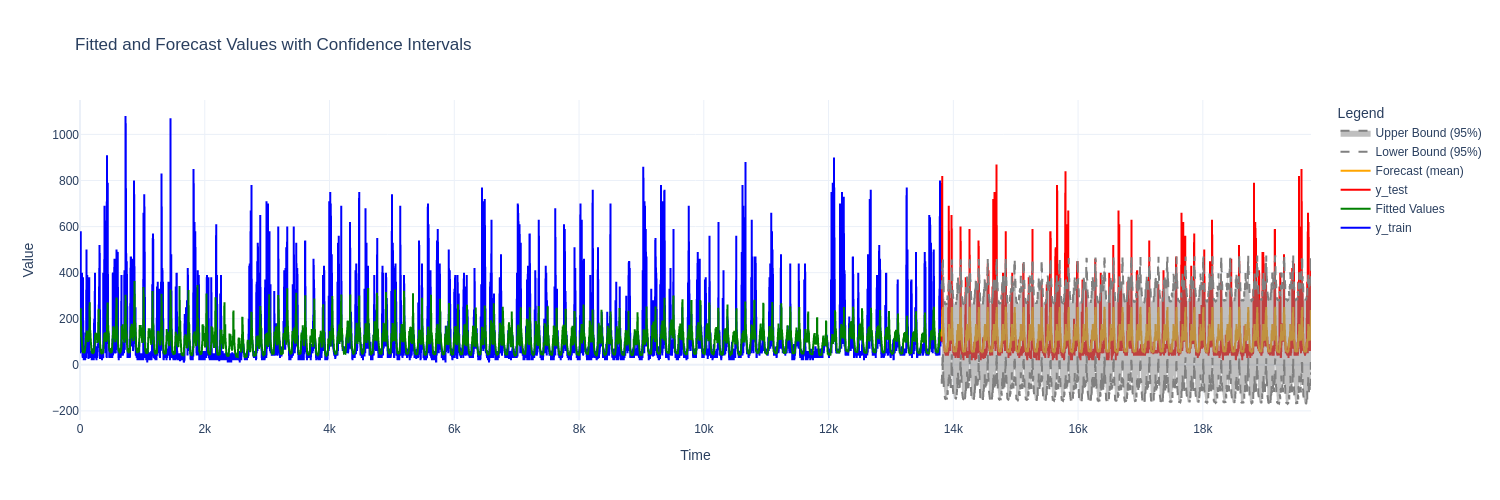

In [96]:
import plotly.graph_objects as go

# Extracting data
fitted_values = forecast_ets['fitted']
mean_forecast = forecast_ets['mean']
lo_95 = forecast_ets['lo-95']
hi_95 = forecast_ets['hi-95']

# Define time indices for training and test data
train_indices = list(range(len(y_train)))
test_indices = list(range(len(y_train), len(y_train) + len(y_test)))

# Create traces
fig = go.Figure()

# Plot the true y_train values
fig.add_trace(go.Scatter(x=train_indices, y=y_train, mode='lines', name='y_train', line=dict(color='blue')))

# Plot the fitted values for y_train
fig.add_trace(go.Scatter(x=train_indices, y=fitted_values, mode='lines', name='Fitted Values', line=dict(color='green')))

# Plot the true y_test values
fig.add_trace(go.Scatter(x=test_indices, y=y_test, mode='lines', name='y_test', line=dict(color='red')))

# Plot the mean forecast values for y_test
fig.add_trace(go.Scatter(x=test_indices, y=mean_forecast, mode='lines', name='Forecast (mean)', line=dict(color='orange')))

# Plot the confidence intervals (lo-95 and hi-95)
fig.add_trace(go.Scatter(x=test_indices, y=lo_95, fill=None, mode='lines', name='Lower Bound (95%)', line=dict(color='gray', dash='dash')))
fig.add_trace(go.Scatter(x=test_indices, y=hi_95, fill='tonexty', mode='lines', name='Upper Bound (95%)', line=dict(color='gray', dash='dash')))

# Update layout
fig.update_layout(
    title="Fitted and Forecast Values with Confidence Intervals",
    xaxis_title="Time",
    yaxis_title="Value",
    legend_title="Legend",
    template="plotly_white",
    height=500, width=1500
)

# Show the plot
# fig.show()
fig.show("png")


As we can see, the model captures the seasonality well but not the peaks of the series.

We can test a SARIMA model for this series as well. However, considering the issue of higher peaks, perhaps the best approach is to find the best distribution that fits this data and to base the model on the choice of that distribution.